Custom data generator to work with BraTS2020 dataset.


In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import random

In [2]:
def load_img(img_dir , img_list):
    images = []
    for i,image_name in enumerate(img_list):
        if(image_name.split('.')[1]=='npy'):
            image = np.load(img_dir + image_name)
            images.append(image)  
    images = np.array(images) 
    return (images)
def imageLoader(img_dir , img_list , mask_dir , mask_list , batch_size):
    L = len(img_list)
    while True:
        batch_start = 0
        batch_end = batch_size
        
        while batch_start < L:
            
            limit = min(batch_end , L)
            
            X = load_img(img_dir , img_list[batch_start:limit]) # load image
            Y = load_img(mask_dir , mask_list[batch_start:limit]) # load mask
            
            yield(X,Y) 
            
            batch_start += batch_size
            batch_end += batch_size

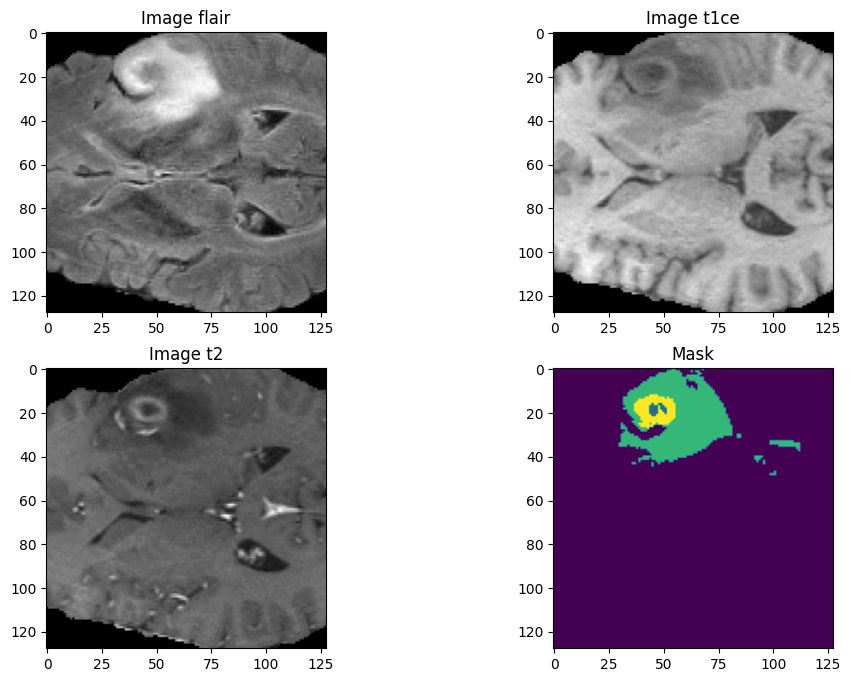

In [3]:
############################################
#Test the generator
train_img_dir = r"C:\Users\abul4\OneDrive\Desktop\Project\BraTS-2020 Final\train\image\\"
train_mask_dir = r"C:\Users\abul4\OneDrive\Desktop\Project\BraTS-2020 Final\train\mask\\"

train_img_list = sorted(os.listdir(train_img_dir))
train_mask_list = sorted(os.listdir(train_mask_dir))

batch_size = 2
train_img_datagen = imageLoader(train_img_dir, train_img_list, 
                                train_mask_dir, train_mask_list, batch_size)

#Verify generator. In python 3 next() is renamed as __next__()
img, msk = train_img_datagen.__next__()


img_num = int(input("Enter image number to view : ")) #only enter number in range of batch size here its 2 [0,1]
test_img=img[img_num]
test_mask=msk[img_num]
test_mask=np.argmax(test_mask, axis=3)

n_slice=int(input("Enter slice number : "))
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()